## 2.1 例題: 種子数の統計モデリング

In [69]:
# ライブラリをインポートする
import polars as pl
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

from scipy.stats import poisson

In [70]:
# データセットを作成する
data = pl.Series("種子数",
                 [2, 2, 4, 6, 4,  5, 2, 3, 1, 2,
                 0, 4, 3, 3, 3,  3, 4, 2, 7, 2,
                 4, 3, 3, 3, 4,  3, 7, 5, 3, 1,
                 7, 6, 4, 6, 5,  2, 4, 7, 2, 2,
                 6, 2, 4, 5, 4,  5, 1, 3, 2, 3])

In [71]:
# データ数を確認する
len(data)

50

In [72]:
# dataの基本統計量を調べる
# Rの場合有効数字3桁, 横持なので合わせる
data.describe().with_columns(pl.col("value").round(decimals = 3)).transpose(include_header = True)

column,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8
str,str,str,str,str,str,str,str,str,str
"""statistic""","""count""","""null_count""","""mean""","""std""","""min""","""25%""","""50%""","""75%""","""max"""
"""value""","""50.0""","""0.0""","""3.56""","""1.728""","""0.0""","""2.0""","""3.0""","""5.0""","""7.0"""


In [73]:
# 度数分布を得る
data.value_counts().sort("種子数").transpose(include_header = True)

column,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7
str,i64,i64,i64,i64,i64,i64,i64,i64
"""種子数""",0,1,2,3,4,5,6,7
"""count""",1,3,11,12,10,5,4,4


Text(0, 0.5, 'Frequency')

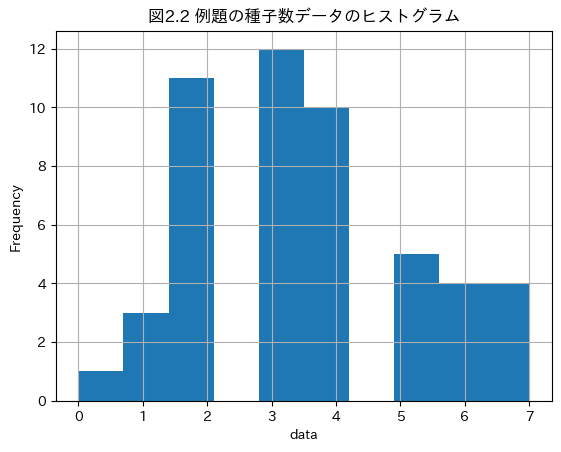

In [83]:
#度数分布をヒストグラムとして図示する.
data.to_pandas().hist()
plt.title("図2.2 例題の種子数データのヒストグラム")
plt.xlabel("data")
plt.ylabel("Frequency")

In [75]:
# データのばらつき(標本分散)
"{:.5}".format(data.var())

'2.9861'

In [76]:
# データのばらつき(標本標準偏差)
print("{:.5}".format( data.std() ))
print("{:.5}".format( np.sqrt(data.var()) ))

1.728
1.728


## 2.2 データと確率分布の対応関係を眺める

In [77]:
# 平均 3.56 のポアソン分布の確率分布
y1 = np.array(range(0, 9))
prob = poisson.pmf(k = y1, mu = 3.56)

c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, '図2.4 平均λ=3.56のポアソン分布')

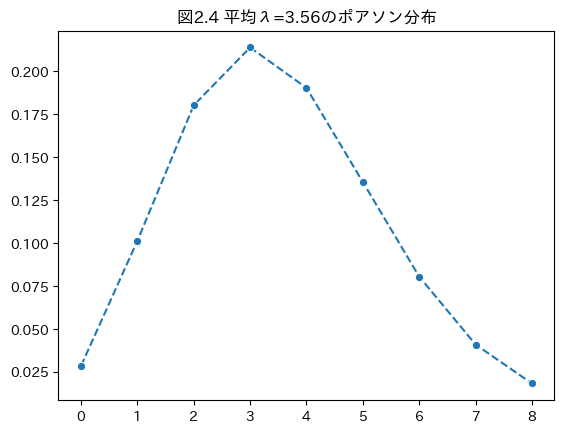

In [78]:
# 確率分布の描画
sns.lineplot(x = y1, y = prob, marker = "o", linestyle = "--")
plt.title("図2.4 平均λ=3.56のポアソン分布")

c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'ratio')

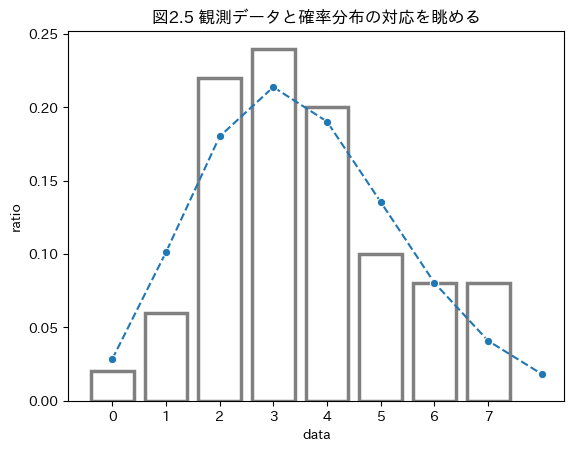

In [79]:
# 観測データと確率分布の対応を眺める
# 度数分布を割合に変換する
data_value_counts = (
    data.value_counts()
    .with_columns((pl.col("count") / pl.sum("count")).alias("count"))
    .to_pandas()
)
sns.barplot(data = data_value_counts,
            x = "種子数", y = "count",
            linewidth = 2.5, edgecolor = "0.5", facecolor = (0, 0, 0, 0),)
# 確率分布
sns.lineplot(x = y1, y = prob, marker = "o", linestyle = "--")

plt.title("図2.5 観測データと確率分布の対応を眺める")
plt.xlabel("data")
plt.ylabel("ratio")

## 2.3 ポアソン分布とは何か?

$p(y | \lambda) =  \frac{\lambda ^ y exp(- \lambda)}{y !}$

$\sum ^ \infty _ {y = 0} p(y | \lambda) = 1$

* 確率分布の平均は$\lambda$である($\lambda \geq 0$)
* 分散と平均は等しい:($\lambda = $平均$=$分散)

c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

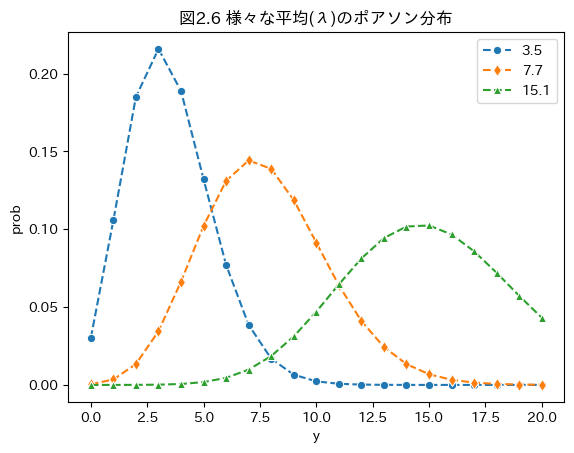

In [80]:
# 様々な平均のポアソン分布を眺める
y2 = np.array(range(0, 21))
sns.lineplot(x = y2, y = poisson.pmf(k = y2, mu = 3.5), marker = "o", linestyle = "--", label = "3.5")
sns.lineplot(x = y2, y = poisson.pmf(k = y2, mu = 7.7), marker = "d", linestyle = "--", label = "7.7")
sns.lineplot(x = y2, y = poisson.pmf(k = y2, mu = 15.1), marker = "^", linestyle = "--", label = "15.1")

plt.title("図2.6 様々な平均(λ)のポアソン分布")
plt.xlabel("y")
plt.ylabel("prob")
plt.legend()

## 2.4 ポアソン分布のパラメータの最尤推定
確率分布

$p(y | \lambda) =  \frac{\lambda ^ y exp(- \lambda)}{y !}$

尤度

$L = \prod p(y | \lambda)$

対数尤度

$\ln L = \sum p(y | \lambda)$

c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

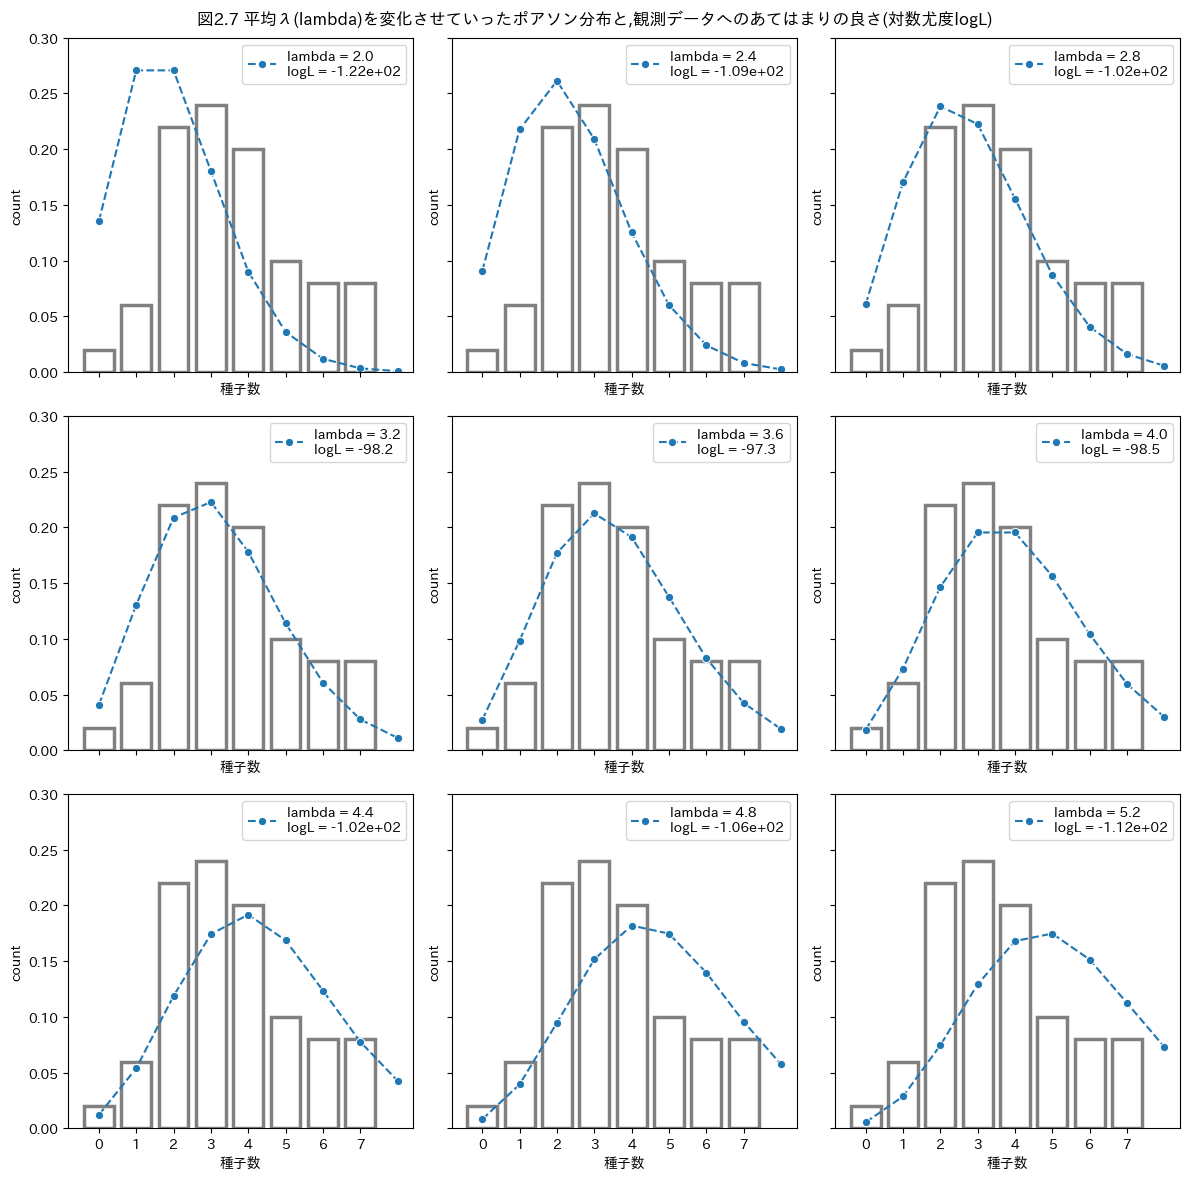

In [86]:
# 平均λ(lambda)を変化させていったポアソン分布と,観測データへのあてはまりの良さを眺める
fig, axes = plt.subplots(3, 3, figsize = (12, 12), sharex = True, sharey = True)

# 割合に変換した度数分布を描画する
for i in range(0, len(axes.ravel())):
    sns.barplot(data = data_value_counts,
                x = "種子数", y = "count",
                linewidth = 2.5, edgecolor = "0.5", facecolor = (0, 0, 0, 0),
                ax = axes[i // 3, i % 3])

# 各パラメータにおける確率分布を描画する
lambdas = [2.0, 2.4, 2.8,   3.2, 3.6, 4.0,   4.4, 4.8, 5.2]
for i, lam in enumerate(lambdas):
    # 対数尤度
    ln_likelihood = poisson.logpmf(k = data.to_numpy(), mu = lam).sum()
    # 確率分布
    prob = poisson.pmf(k = y1, mu = lam)
    label = "lambda = {:.2}\n".format(lam) + "logL = {:.3}".format(ln_likelihood)
    sns.lineplot(x = y1, y = prob, marker = "o", linestyle = "--",
                 label = label,
                 ax = axes[i // 3, i % 3])

plt.suptitle("図2.7 平均λ(lambda)を変化させていったポアソン分布と,観測データへのあてはまりの良さ(対数尤度logL)")
plt.ylim(0, 0.3)
plt.tight_layout()

c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, '対数尤度')

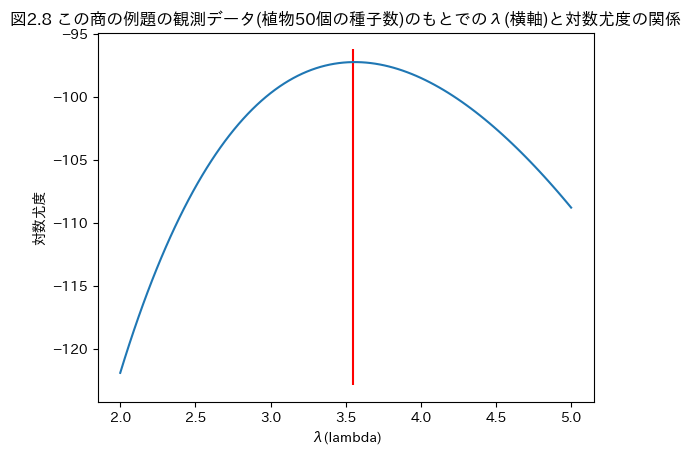

In [82]:
# この章の例題の観測データのもとでのλと対数尤度の関係を眺める
lambdas2 = np.linspace(2, 5, 100)
lnl2 = []
for lam2 in lambdas2:
    lnl2.append(poisson.logpmf(k = data.to_numpy(), mu = lam2).sum())

# maxとlist.indexによる実装
plt.vlines(x =lambdas2[lnl2.index(np.max(lnl2))], ymin = np.min(lnl2) - 1, ymax = np.max(lnl2) + 1,
           color = "red", linestyle = "--")

sns.lineplot(x = lambdas2, y = lnl2)
plt.title("図2.8 この章の例題の観測データ(植物50個の種子数)のもとでのλ(横軸)と対数尤度の関係")
plt.xlabel("λ(lambda)")
plt.ylabel("対数尤度")

## 2.5 統計モデルの要点: 乱数発生・推定・予測